In [1]:
import os
from PIL import Image
import numpy as np
i=0

imgs = []
for file in os.listdir('images/'):
    img = Image.open('images/'+file)
    img_grey = img.convert("L")
    img_grey = img_grey.resize((64,64))
    imgs.append(np.array(img_grey))
    img_grey.save('gray/'+str(i)+'.jpg')
    i+=1

In [2]:
data = np.array(imgs)
data = np.expand_dims(data,axis=3)
data.shape

(240, 64, 64, 1)

In [9]:
import pandas as pd
target = pd.read_csv('target.csv')
target = target['Ra']
target.head(25)

0     1.446
1     2.051
2     2.598
3     3.087
4     2.273
5     2.989
6     2.168
7     2.637
8     2.413
9     1.748
10    1.709
11    1.416
12    1.524
13    2.207
14    1.846
15    1.514
16    1.826
17    1.797
18    1.573
19    1.651
20    1.651
21    1.797
22    1.709
23    2.872
24    2.471
Name: Ra, dtype: float64

In [7]:
data = data.copy()
target = target.copy()

Roughness :  2.872


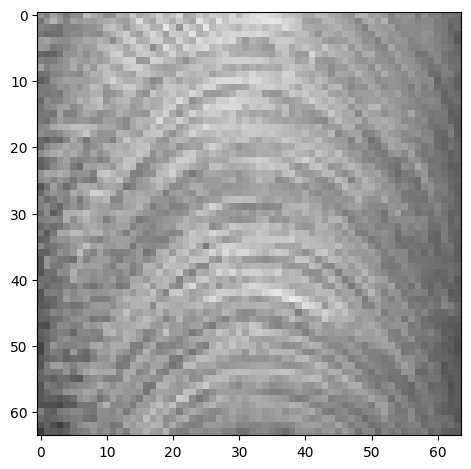

In [8]:
from skimage.io import imshow
imshow(data[23]);
print("Roughness : ",target[23])

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.backend import sum,square,mean,epsilon

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

def r2_score(y_true,y_pred):
    u = sum(square(y_true-y_pred))
    v = sum(square(y_true-mean(y_true)))
    return (1-u/(v+epsilon()))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[r2_score])

# Train the model
model.fit(data, target, epochs=500, batch_size=32)

Epoch 1/500
8/8 [==============================] - 1s 85ms/step - loss: 13568.1504 - r2_score: -13068.1094
Epoch 2/500
8/8 [==============================] - 1s 85ms/step - loss: 1.8715 - r2_score: -1.9544
Epoch 3/500
8/8 [==============================] - 1s 87ms/step - loss: 1.0846 - r2_score: -0.5578
Epoch 4/500
8/8 [==============================] - 1s 85ms/step - loss: 0.7520 - r2_score: -0.2296
Epoch 5/500
8/8 [==============================] - 1s 86ms/step - loss: 0.7891 - r2_score: -0.2286
Epoch 6/500
8/8 [==============================] - 1s 91ms/step - loss: 0.7059 - r2_score: -0.1576
Epoch 7/500
8/8 [==============================] - 1s 97ms/step - loss: 0.6963 - r2_score: -0.0563
Epoch 8/500
8/8 [==============================] - 1s 93ms/step - loss: 0.6693 - r2_score: -0.0499
Epoch 9/500
8/8 [==============================] - 1s 103ms/step - loss: 0.6630 - r2_score: -0.0299
Epoch 10/500
8/8 [==============================] - 1s 92ms/step - loss: 0.6399 - r2_score: 0.0125
E

8/8 [==============================] - 1s 88ms/step - loss: 0.1560 - r2_score: 0.7579
Epoch 84/500
8/8 [==============================] - 1s 86ms/step - loss: 0.1747 - r2_score: 0.7080
Epoch 85/500
8/8 [==============================] - 1s 86ms/step - loss: 0.1599 - r2_score: 0.7556
Epoch 86/500
8/8 [==============================] - 1s 95ms/step - loss: 0.1717 - r2_score: 0.7323
Epoch 87/500
8/8 [==============================] - 1s 89ms/step - loss: 0.1557 - r2_score: 0.7447
Epoch 88/500
8/8 [==============================] - 1s 87ms/step - loss: 0.1208 - r2_score: 0.7998
Epoch 89/500
8/8 [==============================] - 1s 91ms/step - loss: 0.1155 - r2_score: 0.8108
Epoch 90/500
8/8 [==============================] - 1s 87ms/step - loss: 0.0976 - r2_score: 0.8441
Epoch 91/500
8/8 [==============================] - 1s 89ms/step - loss: 0.0957 - r2_score: 0.8526
Epoch 92/500
8/8 [==============================] - 1s 92ms/step - loss: 0.0833 - r2_score: 0.8611
Epoch 93/500
8/8 [=====

8/8 [==============================] - 1s 98ms/step - loss: 9.4133e-04 - r2_score: 0.9985
Epoch 166/500
8/8 [==============================] - 1s 98ms/step - loss: 9.7694e-04 - r2_score: 0.9984
Epoch 167/500
8/8 [==============================] - 1s 96ms/step - loss: 0.0015 - r2_score: 0.9975
Epoch 168/500
8/8 [==============================] - 1s 98ms/step - loss: 0.0013 - r2_score: 0.9978
Epoch 169/500
8/8 [==============================] - 1s 97ms/step - loss: 0.0012 - r2_score: 0.9980
Epoch 170/500
8/8 [==============================] - 1s 99ms/step - loss: 0.0011 - r2_score: 0.9983
Epoch 171/500
8/8 [==============================] - 1s 106ms/step - loss: 0.0017 - r2_score: 0.9972
Epoch 172/500
8/8 [==============================] - 1s 108ms/step - loss: 6.0909e-04 - r2_score: 0.9990
Epoch 173/500
8/8 [==============================] - 1s 106ms/step - loss: 5.3640e-04 - r2_score: 0.9991
Epoch 174/500
8/8 [==============================] - 1s 103ms/step - loss: 7.9804e-04 - r2_scor

8/8 [==============================] - 1s 86ms/step - loss: 4.7719e-05 - r2_score: 0.9999
Epoch 245/500
8/8 [==============================] - 1s 85ms/step - loss: 1.4323e-04 - r2_score: 0.9997
Epoch 246/500
8/8 [==============================] - 1s 85ms/step - loss: 3.7950e-04 - r2_score: 0.9993
Epoch 247/500
8/8 [==============================] - 1s 87ms/step - loss: 3.8866e-04 - r2_score: 0.9994
Epoch 248/500
8/8 [==============================] - 1s 86ms/step - loss: 4.1743e-04 - r2_score: 0.9993
Epoch 249/500
8/8 [==============================] - 1s 84ms/step - loss: 2.3647e-04 - r2_score: 0.9996
Epoch 250/500
8/8 [==============================] - 1s 85ms/step - loss: 2.0789e-04 - r2_score: 0.9997
Epoch 251/500
8/8 [==============================] - 1s 85ms/step - loss: 3.1228e-04 - r2_score: 0.9995
Epoch 252/500
8/8 [==============================] - 1s 83ms/step - loss: 3.3847e-04 - r2_score: 0.9995
Epoch 253/500
8/8 [==============================] - 1s 86ms/step - loss: 4.52

8/8 [==============================] - 1s 86ms/step - loss: 0.4995 - r2_score: 0.1854
Epoch 325/500
8/8 [==============================] - 1s 83ms/step - loss: 0.5192 - r2_score: 0.2323
Epoch 326/500
8/8 [==============================] - 1s 87ms/step - loss: 0.4907 - r2_score: 0.1017
Epoch 327/500
8/8 [==============================] - 1s 93ms/step - loss: 0.4809 - r2_score: 0.2737
Epoch 328/500
8/8 [==============================] - 1s 93ms/step - loss: 0.4885 - r2_score: 0.2188
Epoch 329/500
8/8 [==============================] - 1s 100ms/step - loss: 0.5244 - r2_score: 0.1715
Epoch 330/500
8/8 [==============================] - 1s 98ms/step - loss: 0.4714 - r2_score: 0.2249
Epoch 331/500
8/8 [==============================] - 1s 97ms/step - loss: 0.4622 - r2_score: 0.2832
Epoch 332/500
8/8 [==============================] - 1s 85ms/step - loss: 0.4730 - r2_score: 0.2574
Epoch 333/500
8/8 [==============================] - 1s 86ms/step - loss: 0.4551 - r2_score: 0.2816
Epoch 334/500

Epoch 406/500
8/8 [==============================] - 1s 85ms/step - loss: 0.1013 - r2_score: 0.8326
Epoch 407/500
8/8 [==============================] - 1s 85ms/step - loss: 0.0995 - r2_score: 0.8061
Epoch 408/500
8/8 [==============================] - 1s 95ms/step - loss: 0.0989 - r2_score: 0.8489
Epoch 409/500
8/8 [==============================] - 1s 89ms/step - loss: 0.1037 - r2_score: 0.8227
Epoch 410/500
8/8 [==============================] - 1s 87ms/step - loss: 0.1047 - r2_score: 0.8416
Epoch 411/500
8/8 [==============================] - 1s 87ms/step - loss: 0.0860 - r2_score: 0.8708
Epoch 412/500
8/8 [==============================] - 1s 101ms/step - loss: 0.0808 - r2_score: 0.8791
Epoch 413/500
8/8 [==============================] - 1s 87ms/step - loss: 0.0768 - r2_score: 0.8758
Epoch 414/500
8/8 [==============================] - 1s 86ms/step - loss: 0.0721 - r2_score: 0.8816
Epoch 415/500
8/8 [==============================] - 1s 98ms/step - loss: 0.0788 - r2_score: 0.8763

8/8 [==============================] - 1s 90ms/step - loss: 6.2557e-04 - r2_score: 0.9987
Epoch 488/500
8/8 [==============================] - 1s 86ms/step - loss: 5.3541e-04 - r2_score: 0.9991
Epoch 489/500
8/8 [==============================] - 1s 85ms/step - loss: 5.3030e-04 - r2_score: 0.9992
Epoch 490/500
8/8 [==============================] - 1s 91ms/step - loss: 5.5981e-04 - r2_score: 0.9991
Epoch 491/500
8/8 [==============================] - 1s 95ms/step - loss: 7.1061e-04 - r2_score: 0.9988
Epoch 492/500
8/8 [==============================] - 1s 95ms/step - loss: 5.1848e-04 - r2_score: 0.9992
Epoch 493/500
8/8 [==============================] - 1s 98ms/step - loss: 5.9346e-04 - r2_score: 0.9990
Epoch 494/500
8/8 [==============================] - 1s 90ms/step - loss: 6.5507e-04 - r2_score: 0.9988
Epoch 495/500
8/8 [==============================] - 1s 97ms/step - loss: 5.2131e-04 - r2_score: 0.9991
Epoch 496/500
8/8 [==============================] - 1s 99ms/step - loss: 3.58

In [23]:
model.save('surface_model.h5')

In [33]:
img = Image.open('gray/238.jpg')
img_grey = img.convert("L")
img_grey = img_grey.resize((64,64))
imgs = np.array(img_grey)
data = np.reshape(imgs,(1,64,64,1))

In [34]:
img_pred = model.predict(data)

1/1 [==============================] - 0s 18ms/step


In [35]:
img_pred[0][0]

3.0726538